## Visualise annotations on synthetic maps

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon
import matplotlib.image as mpimg
import ast

In [25]:
ROOT = "E:/codes/cadastre_synth_maps"
path = f"{ROOT}/"

KeyboardInterrupt: 

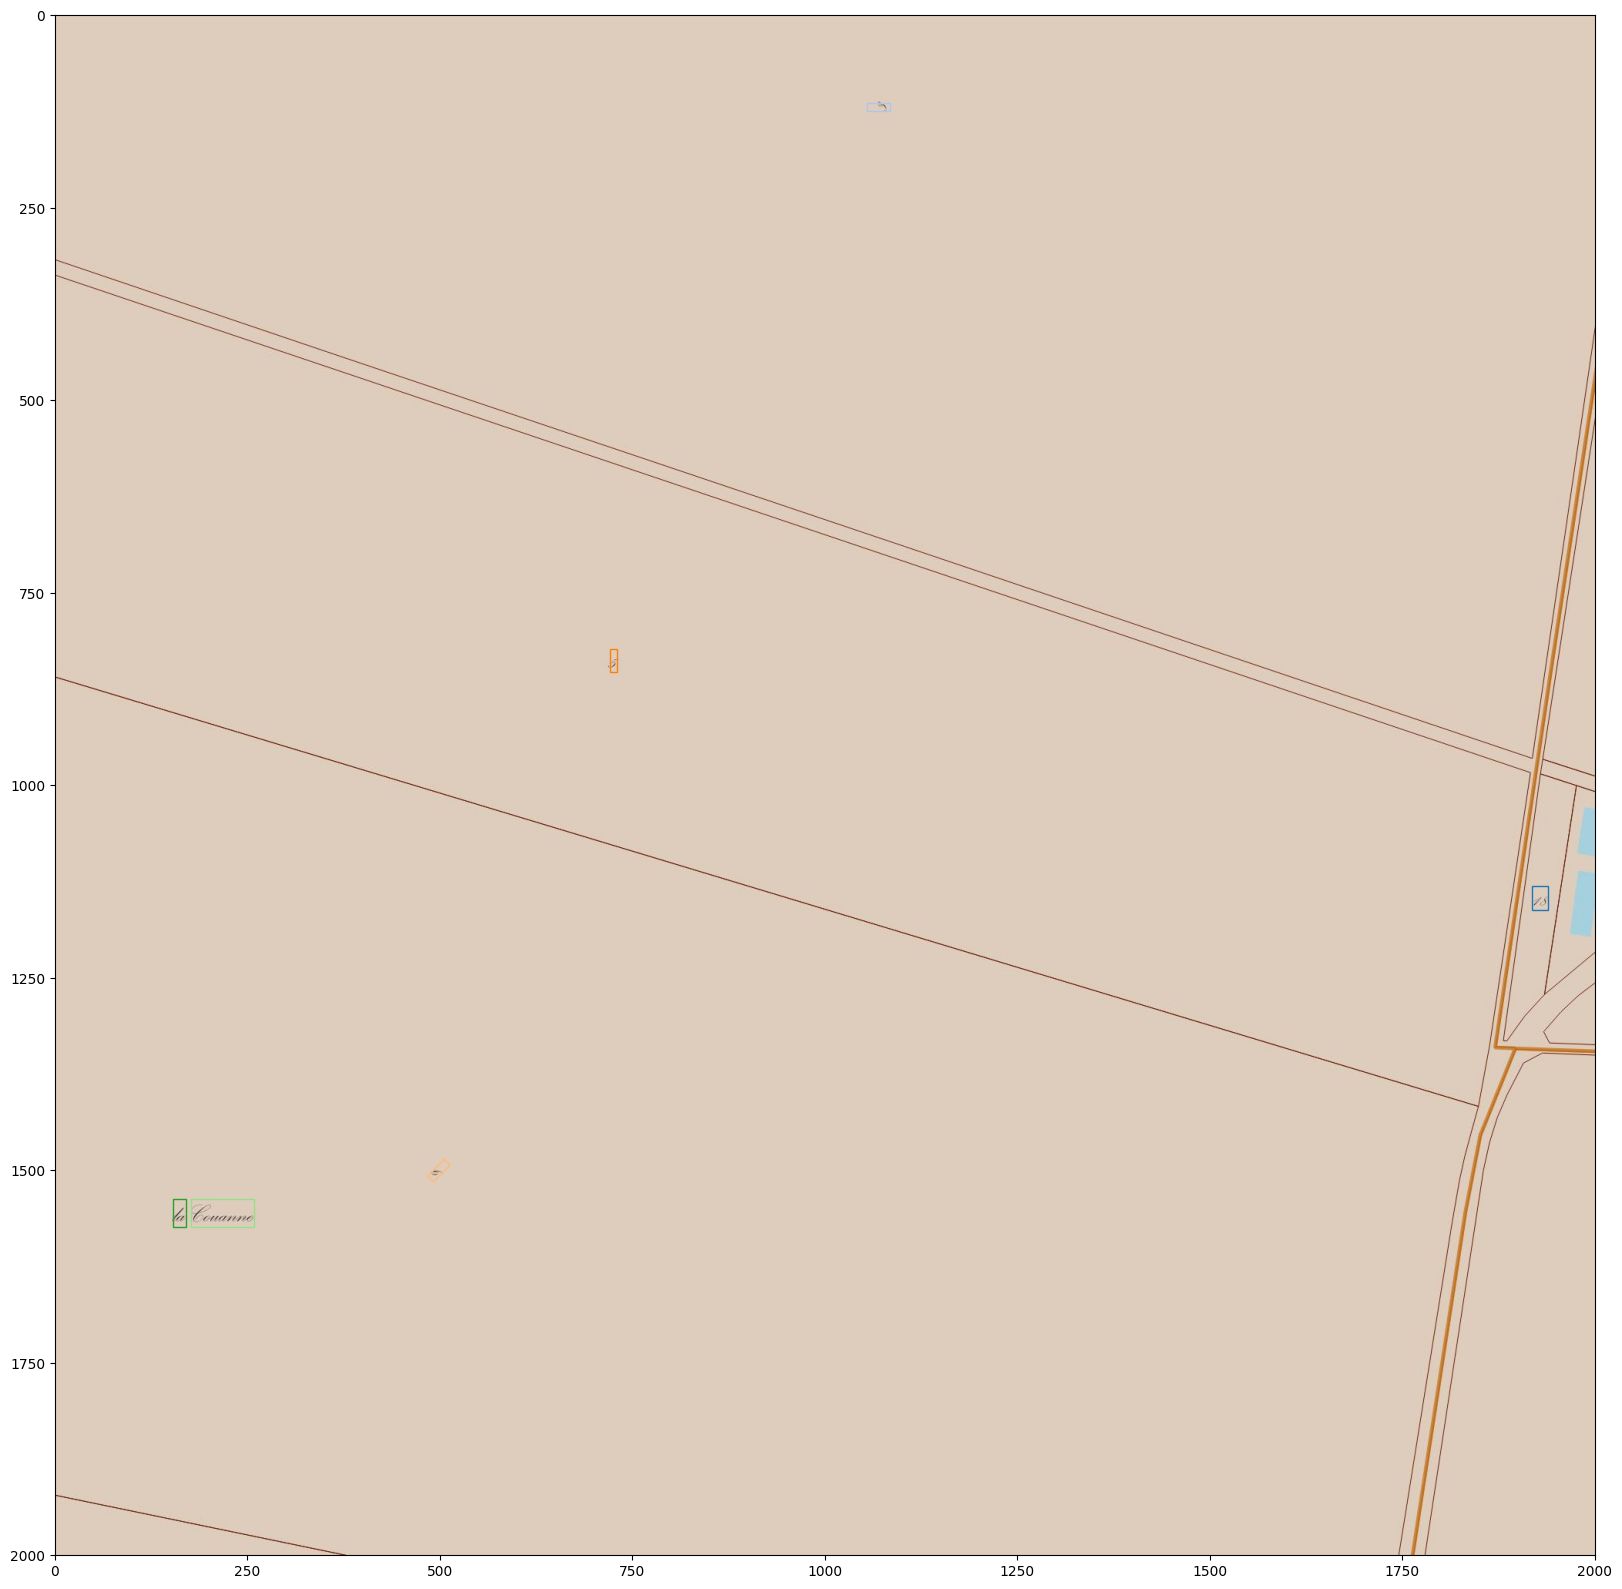

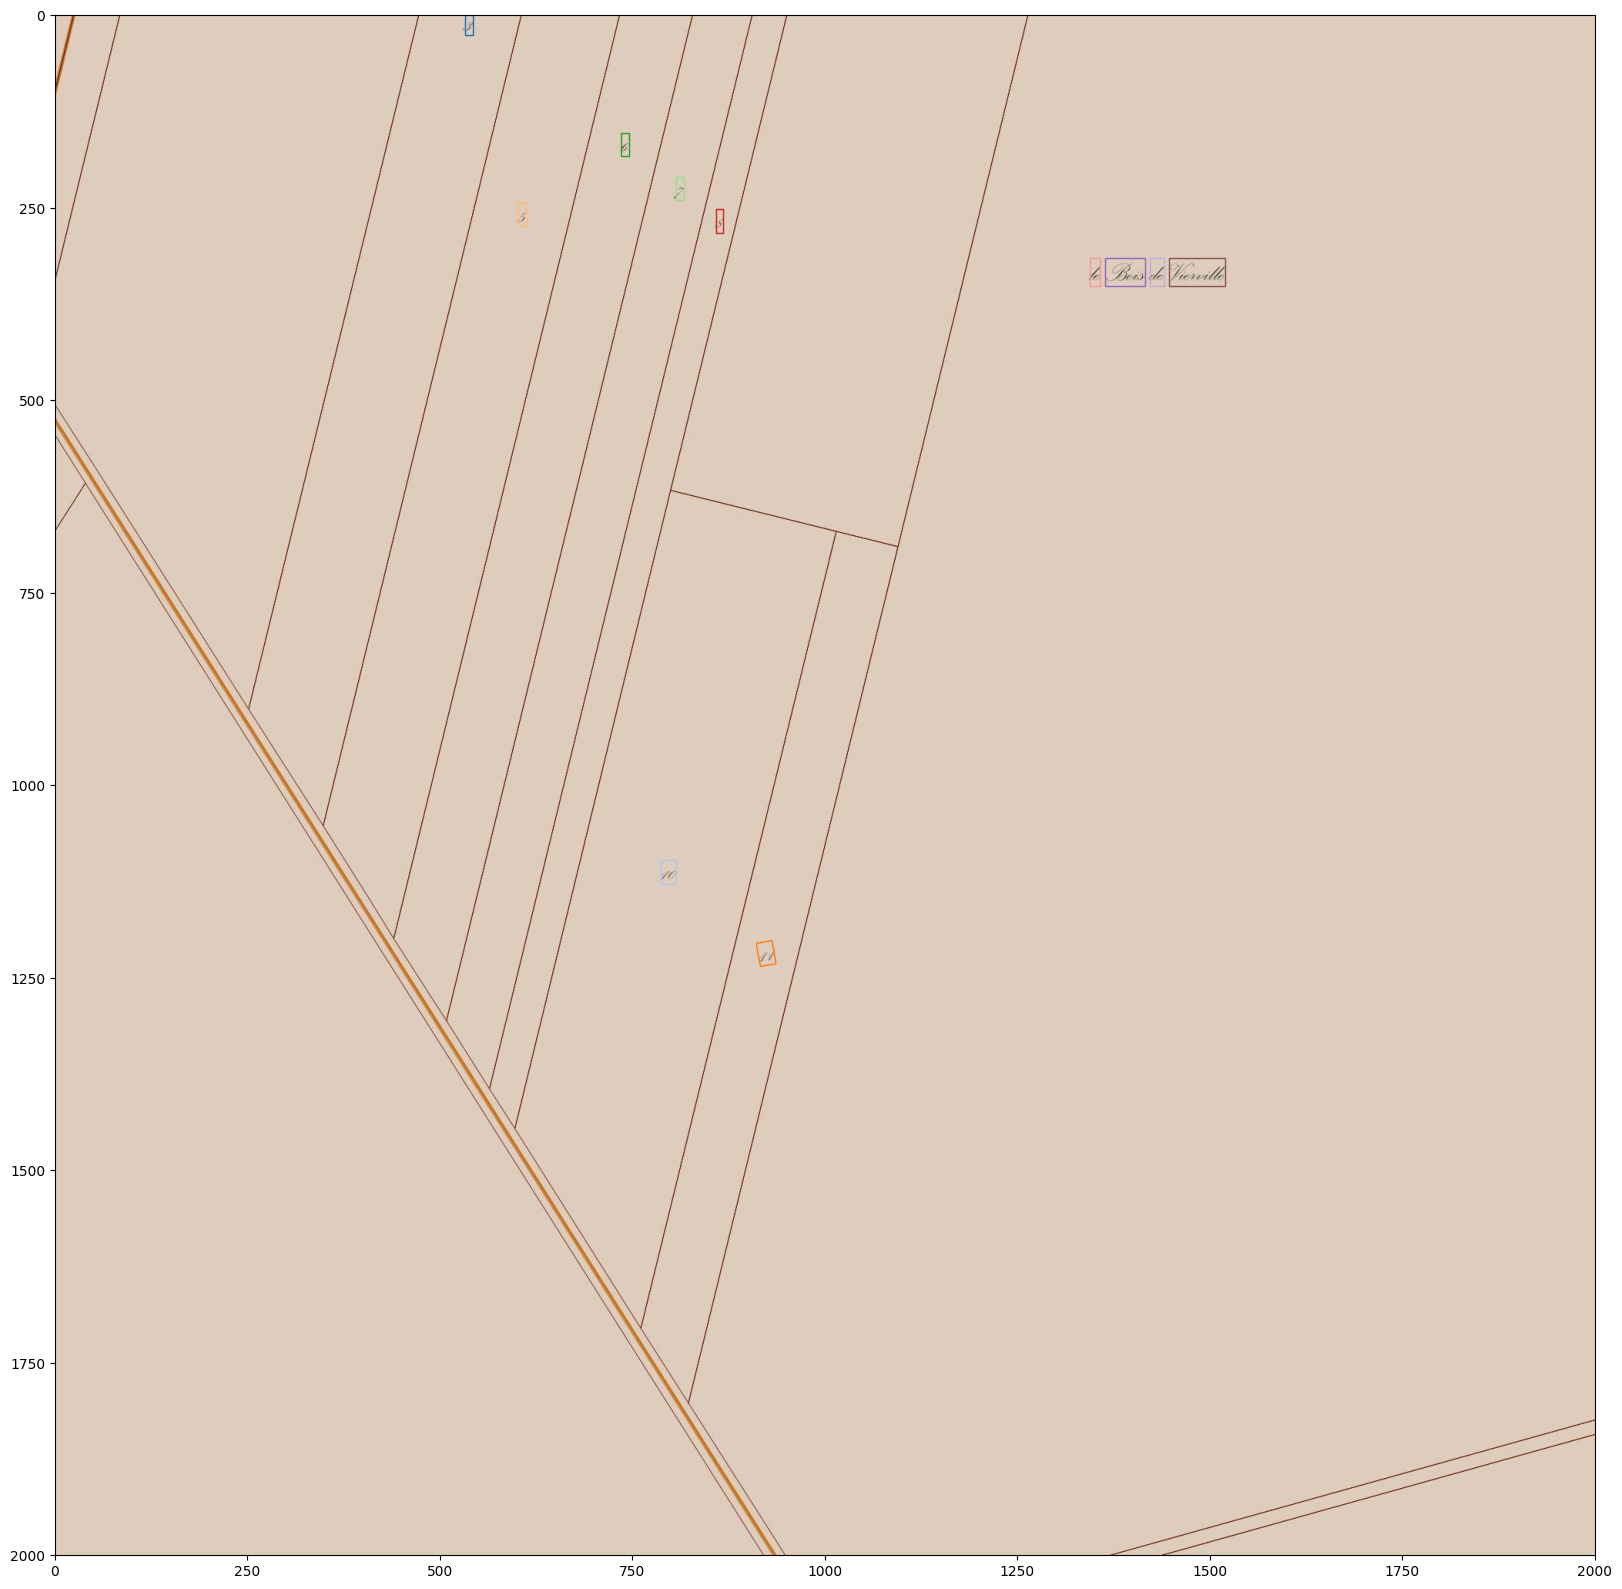

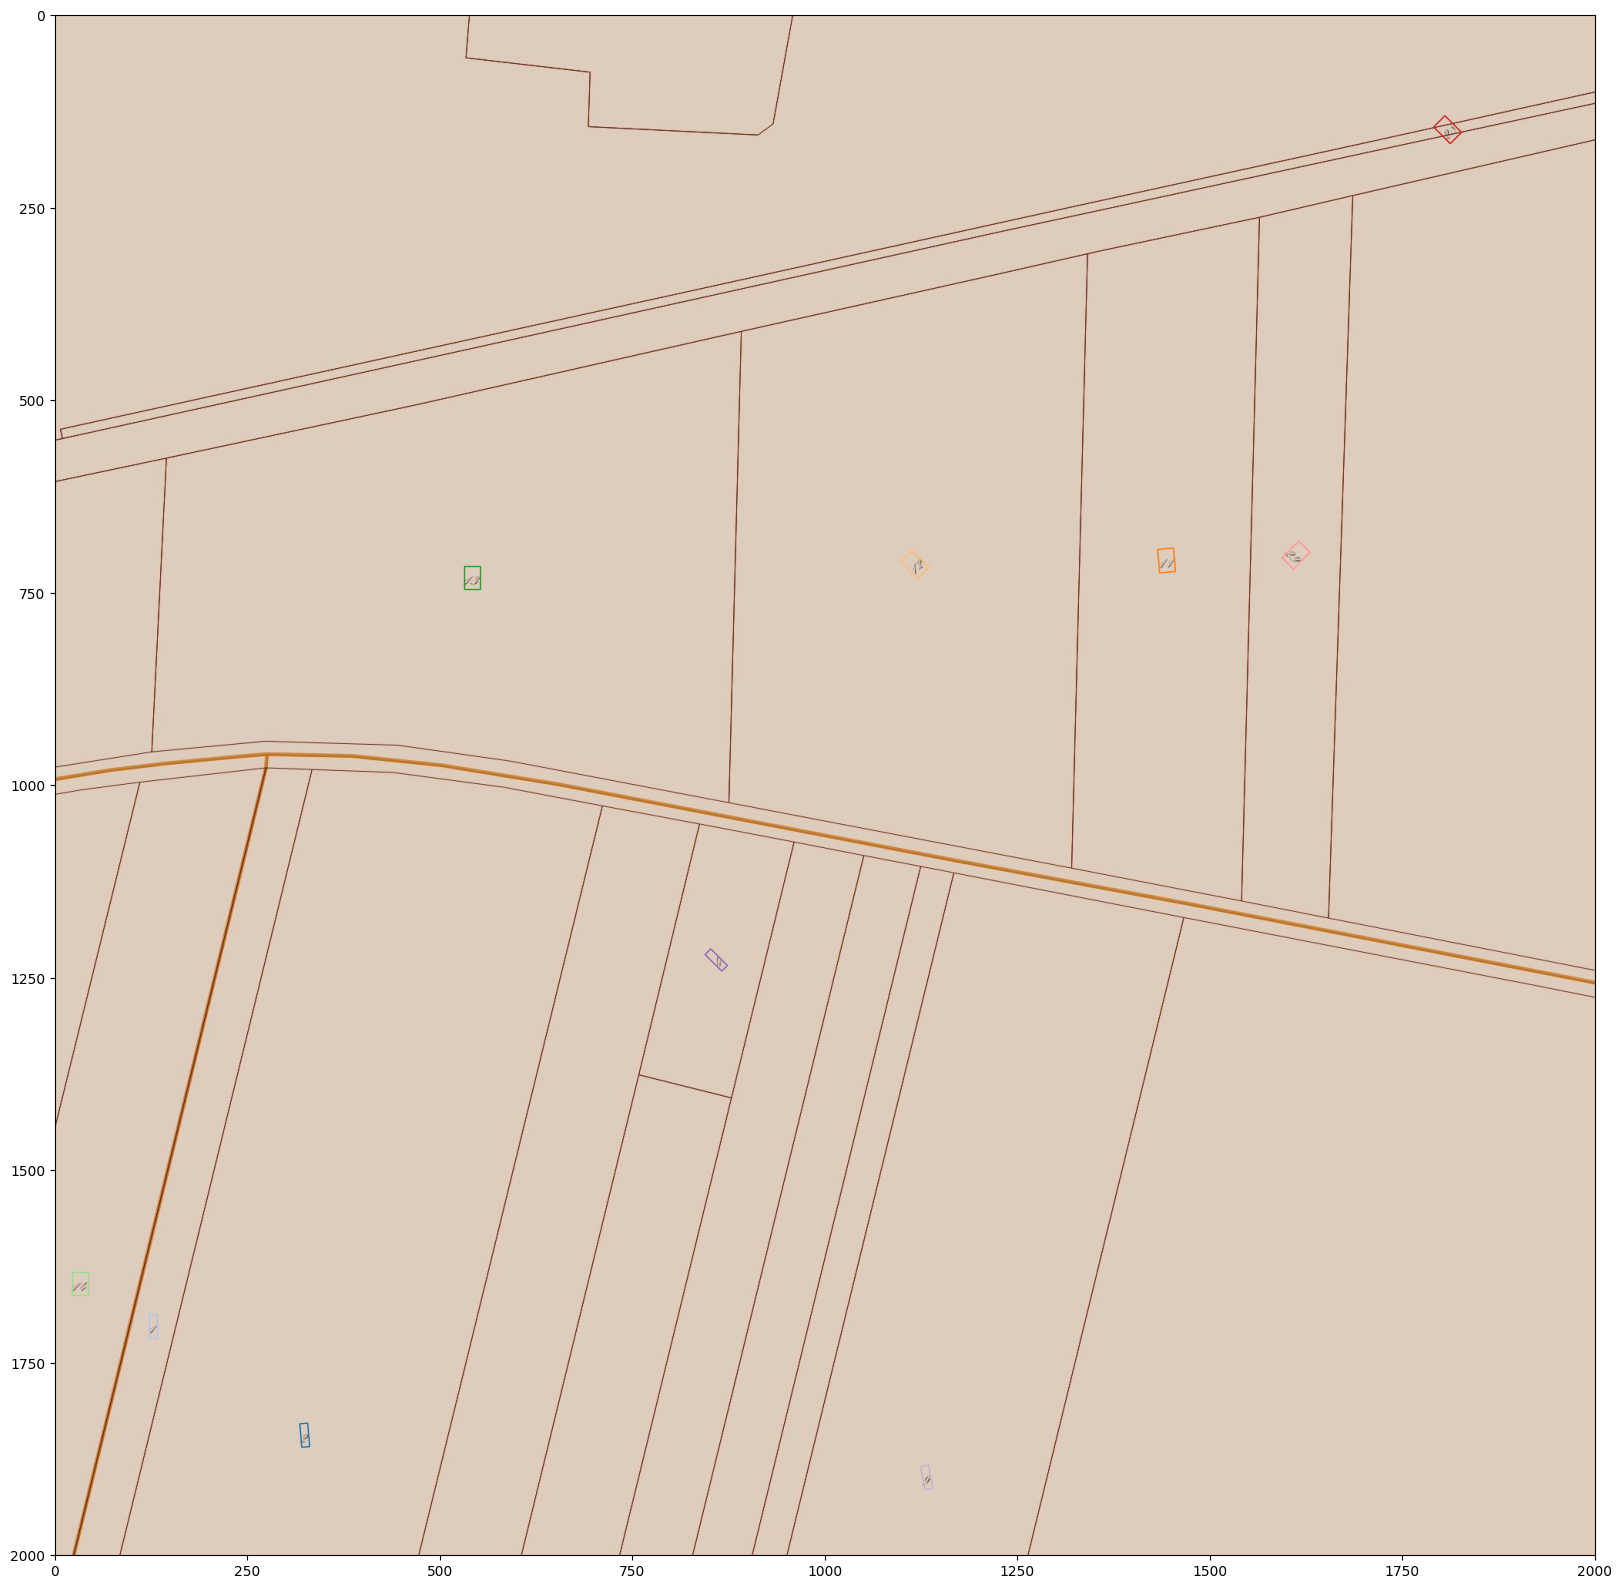

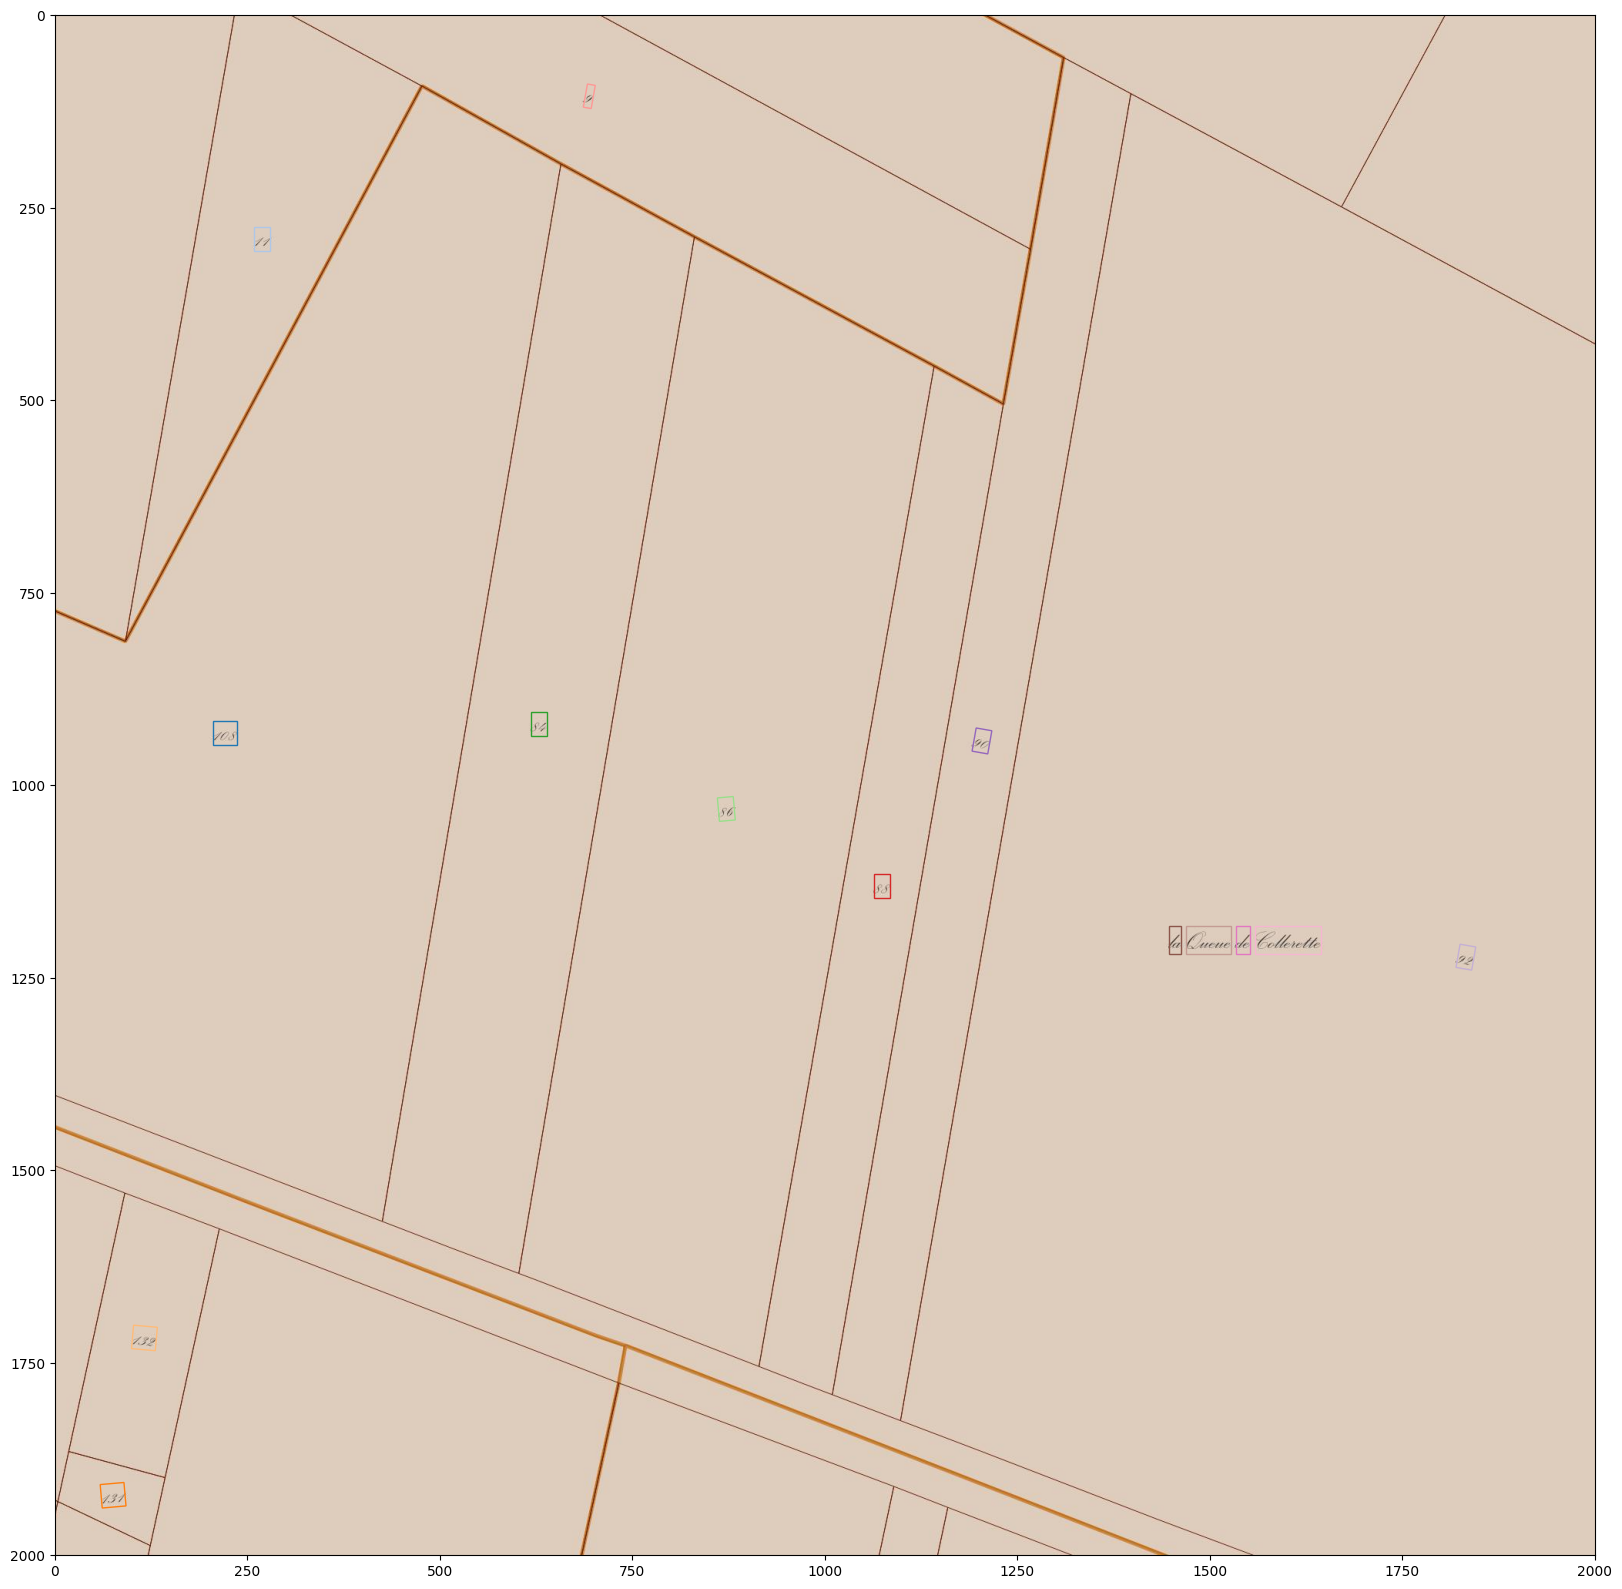

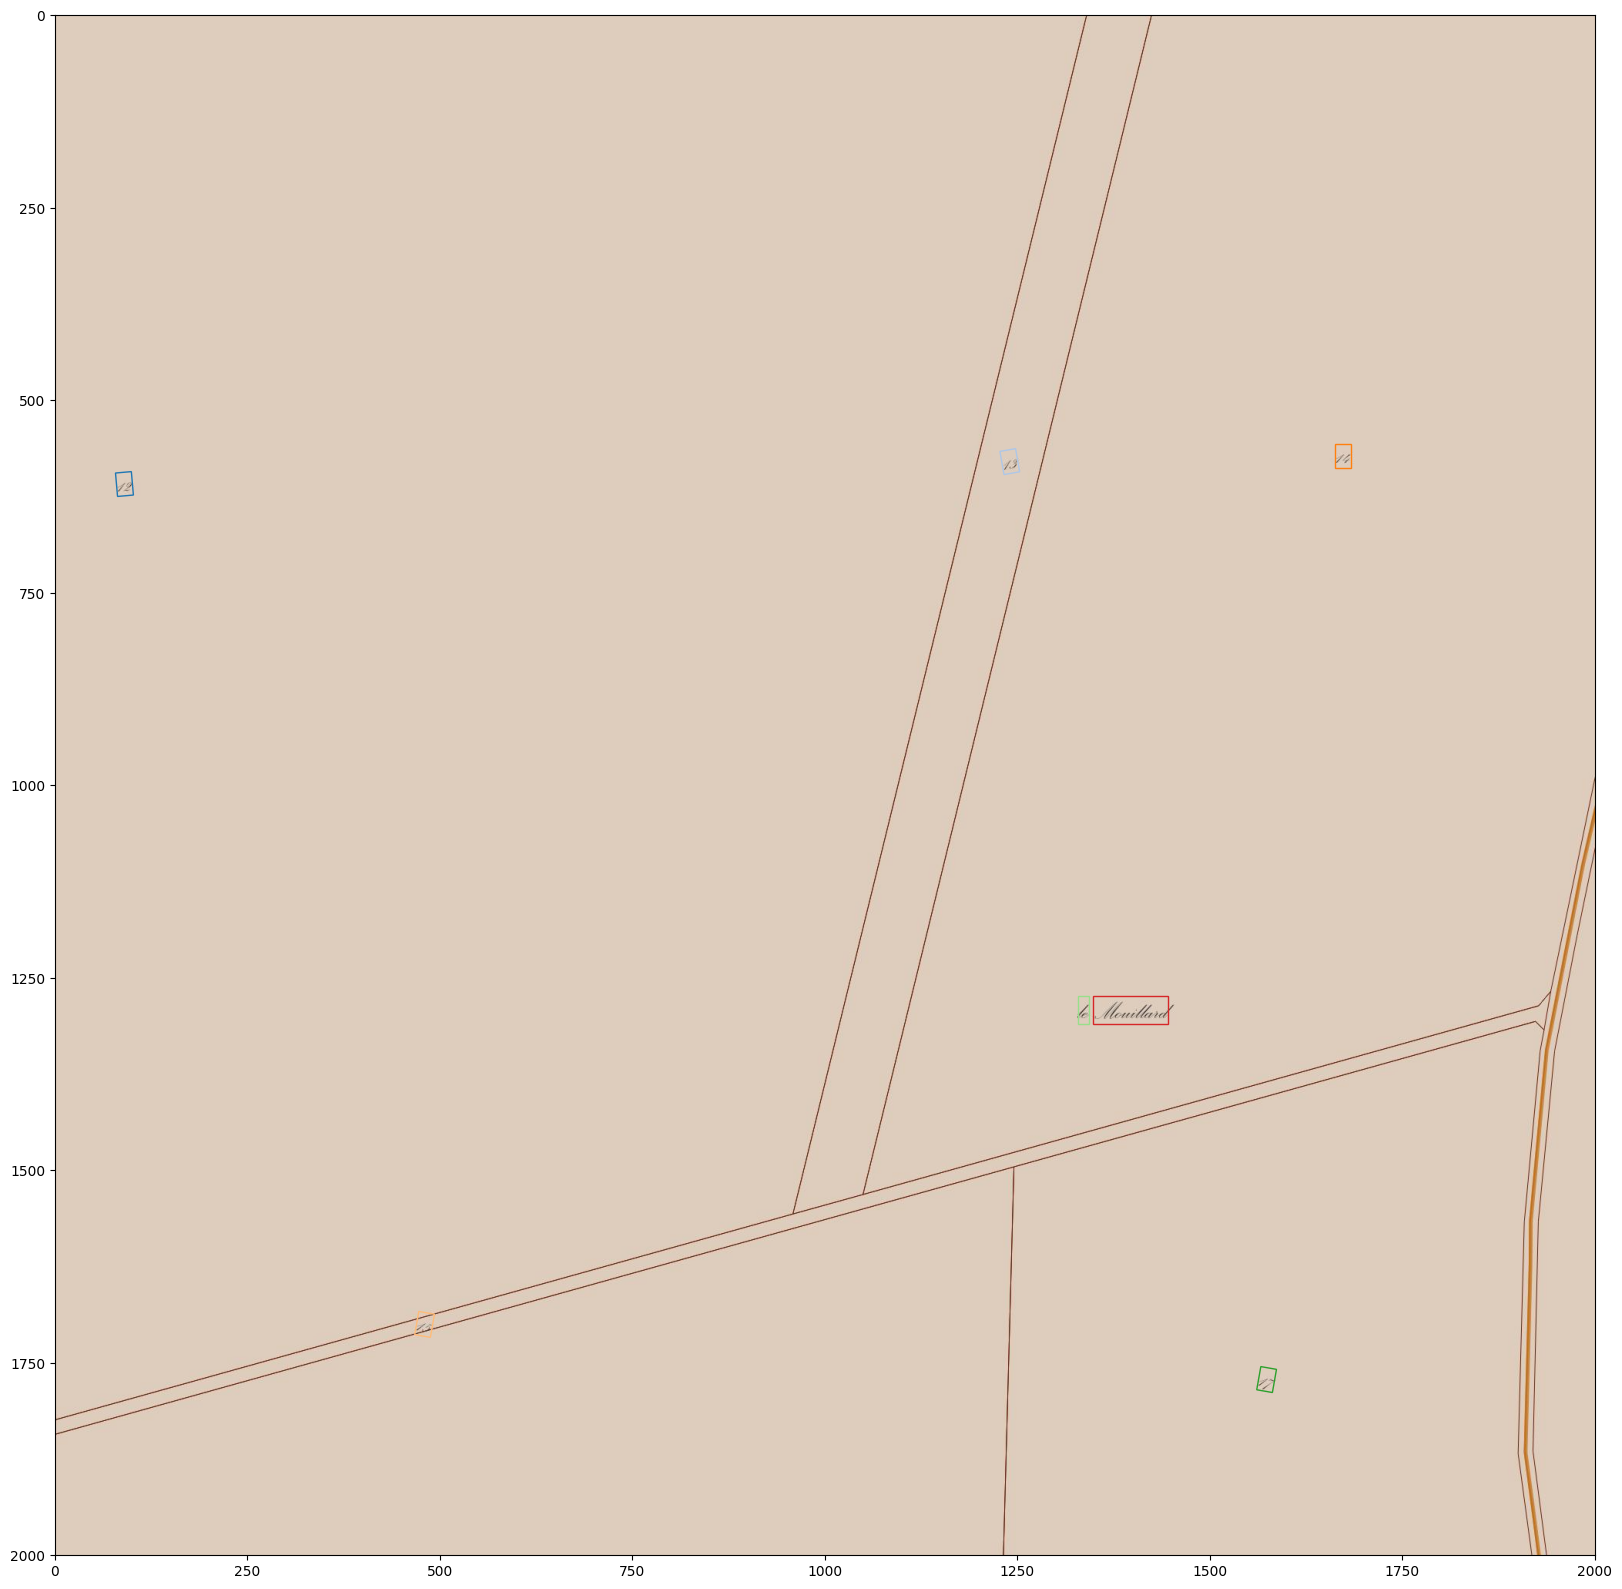

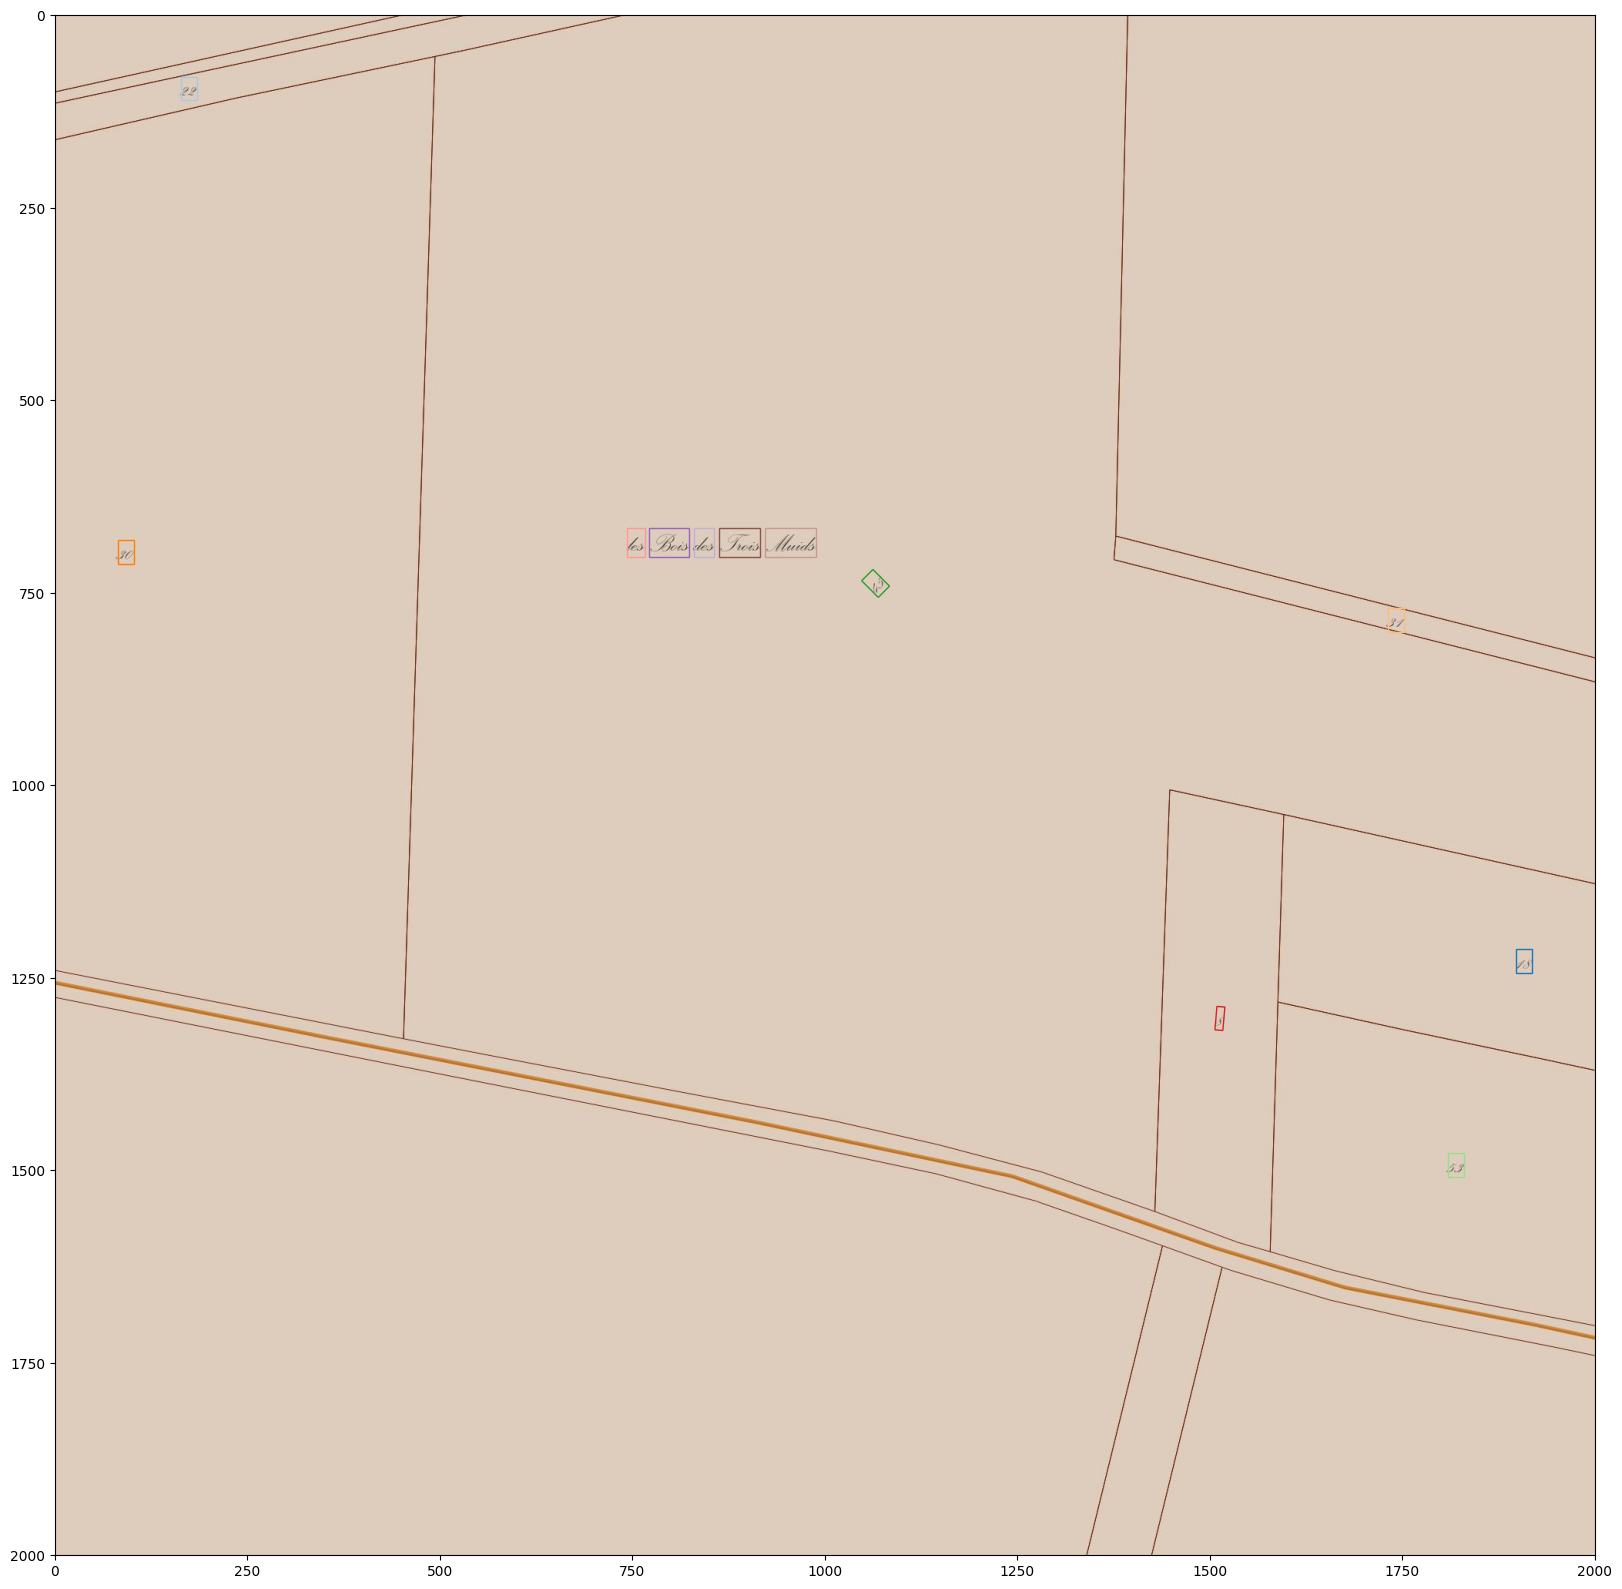

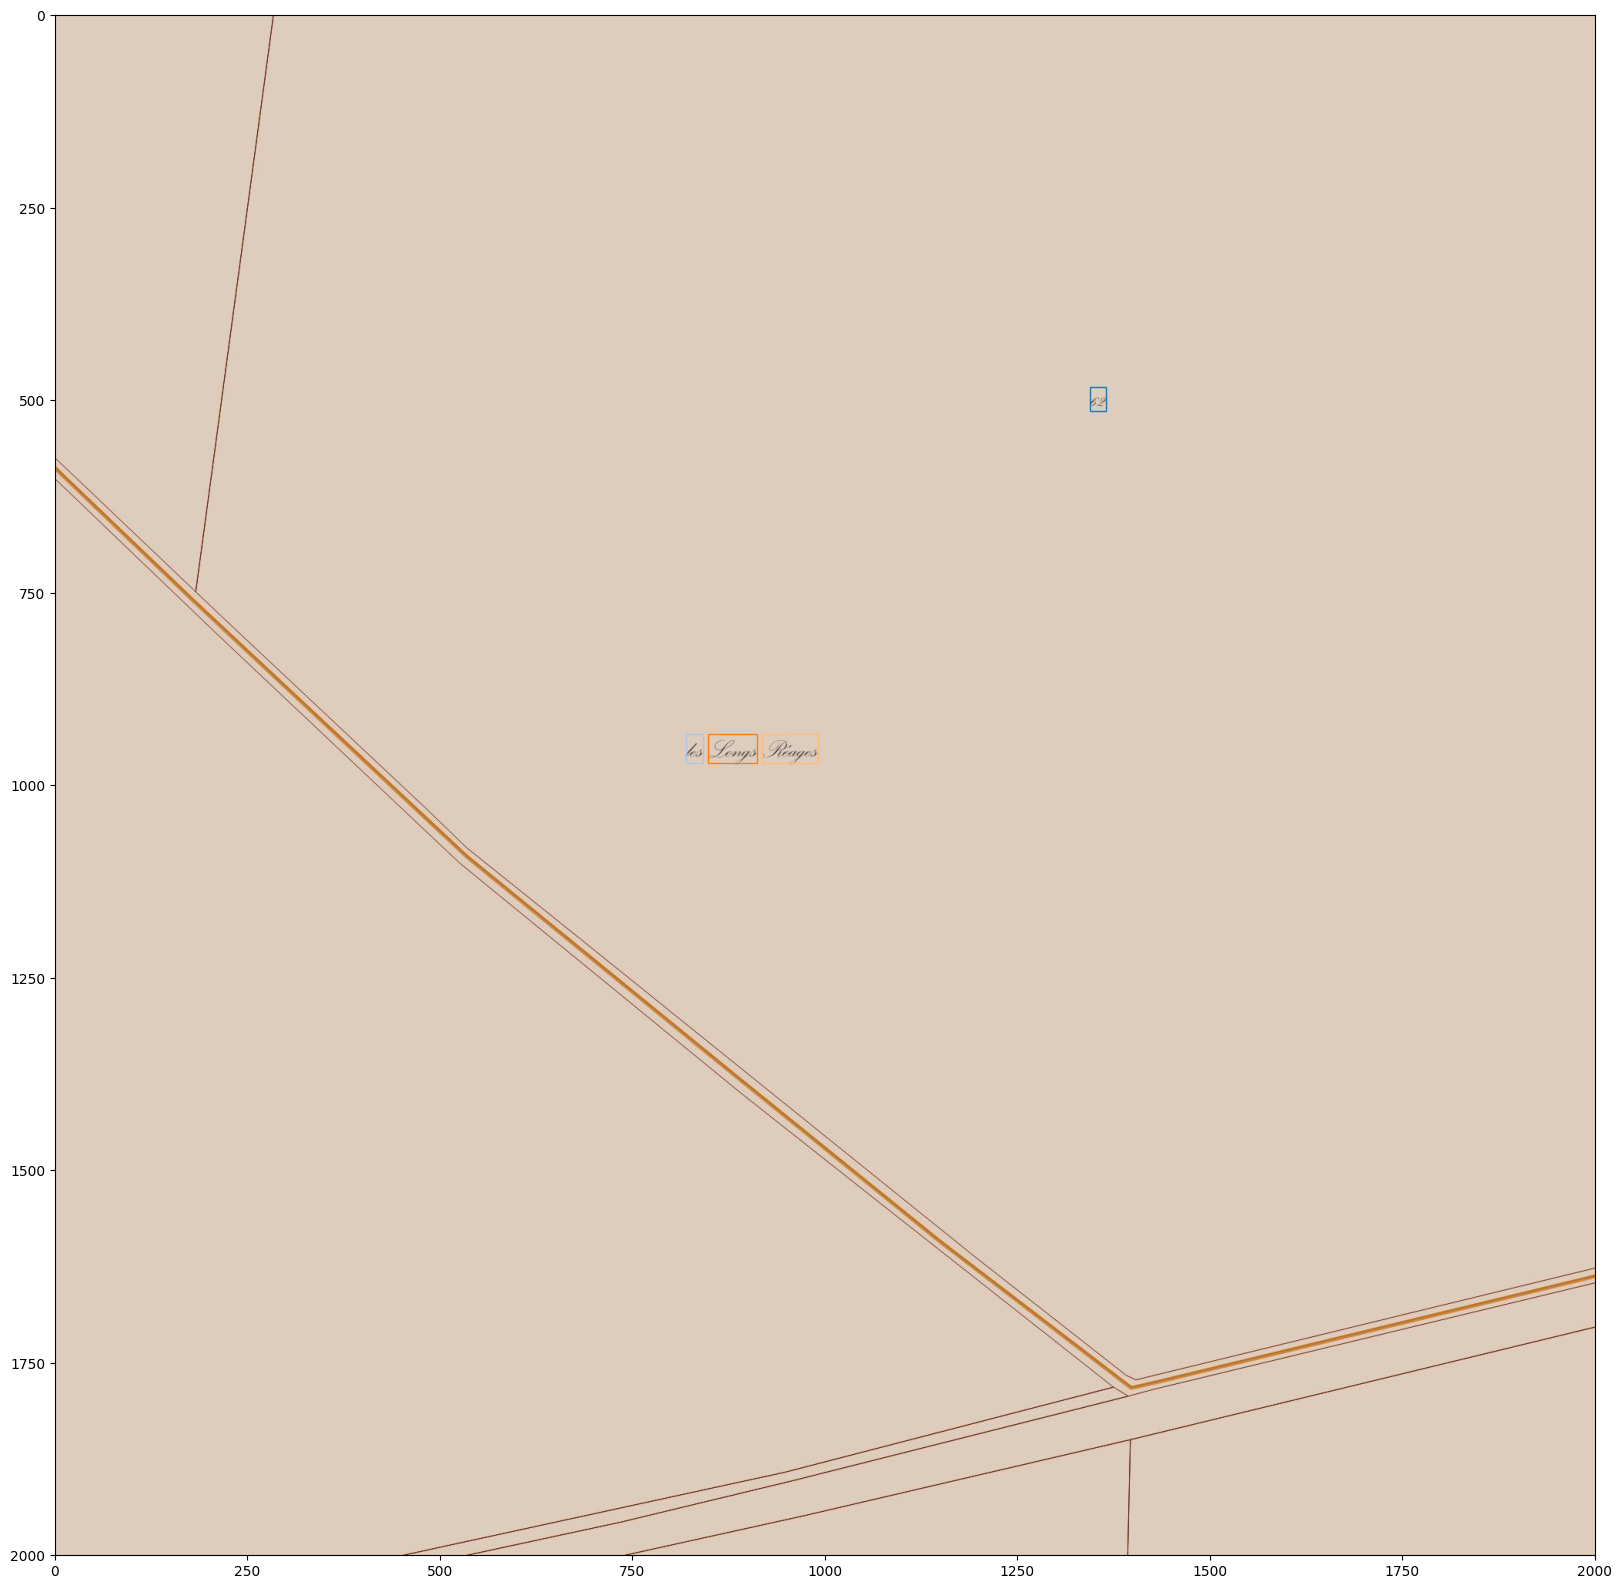

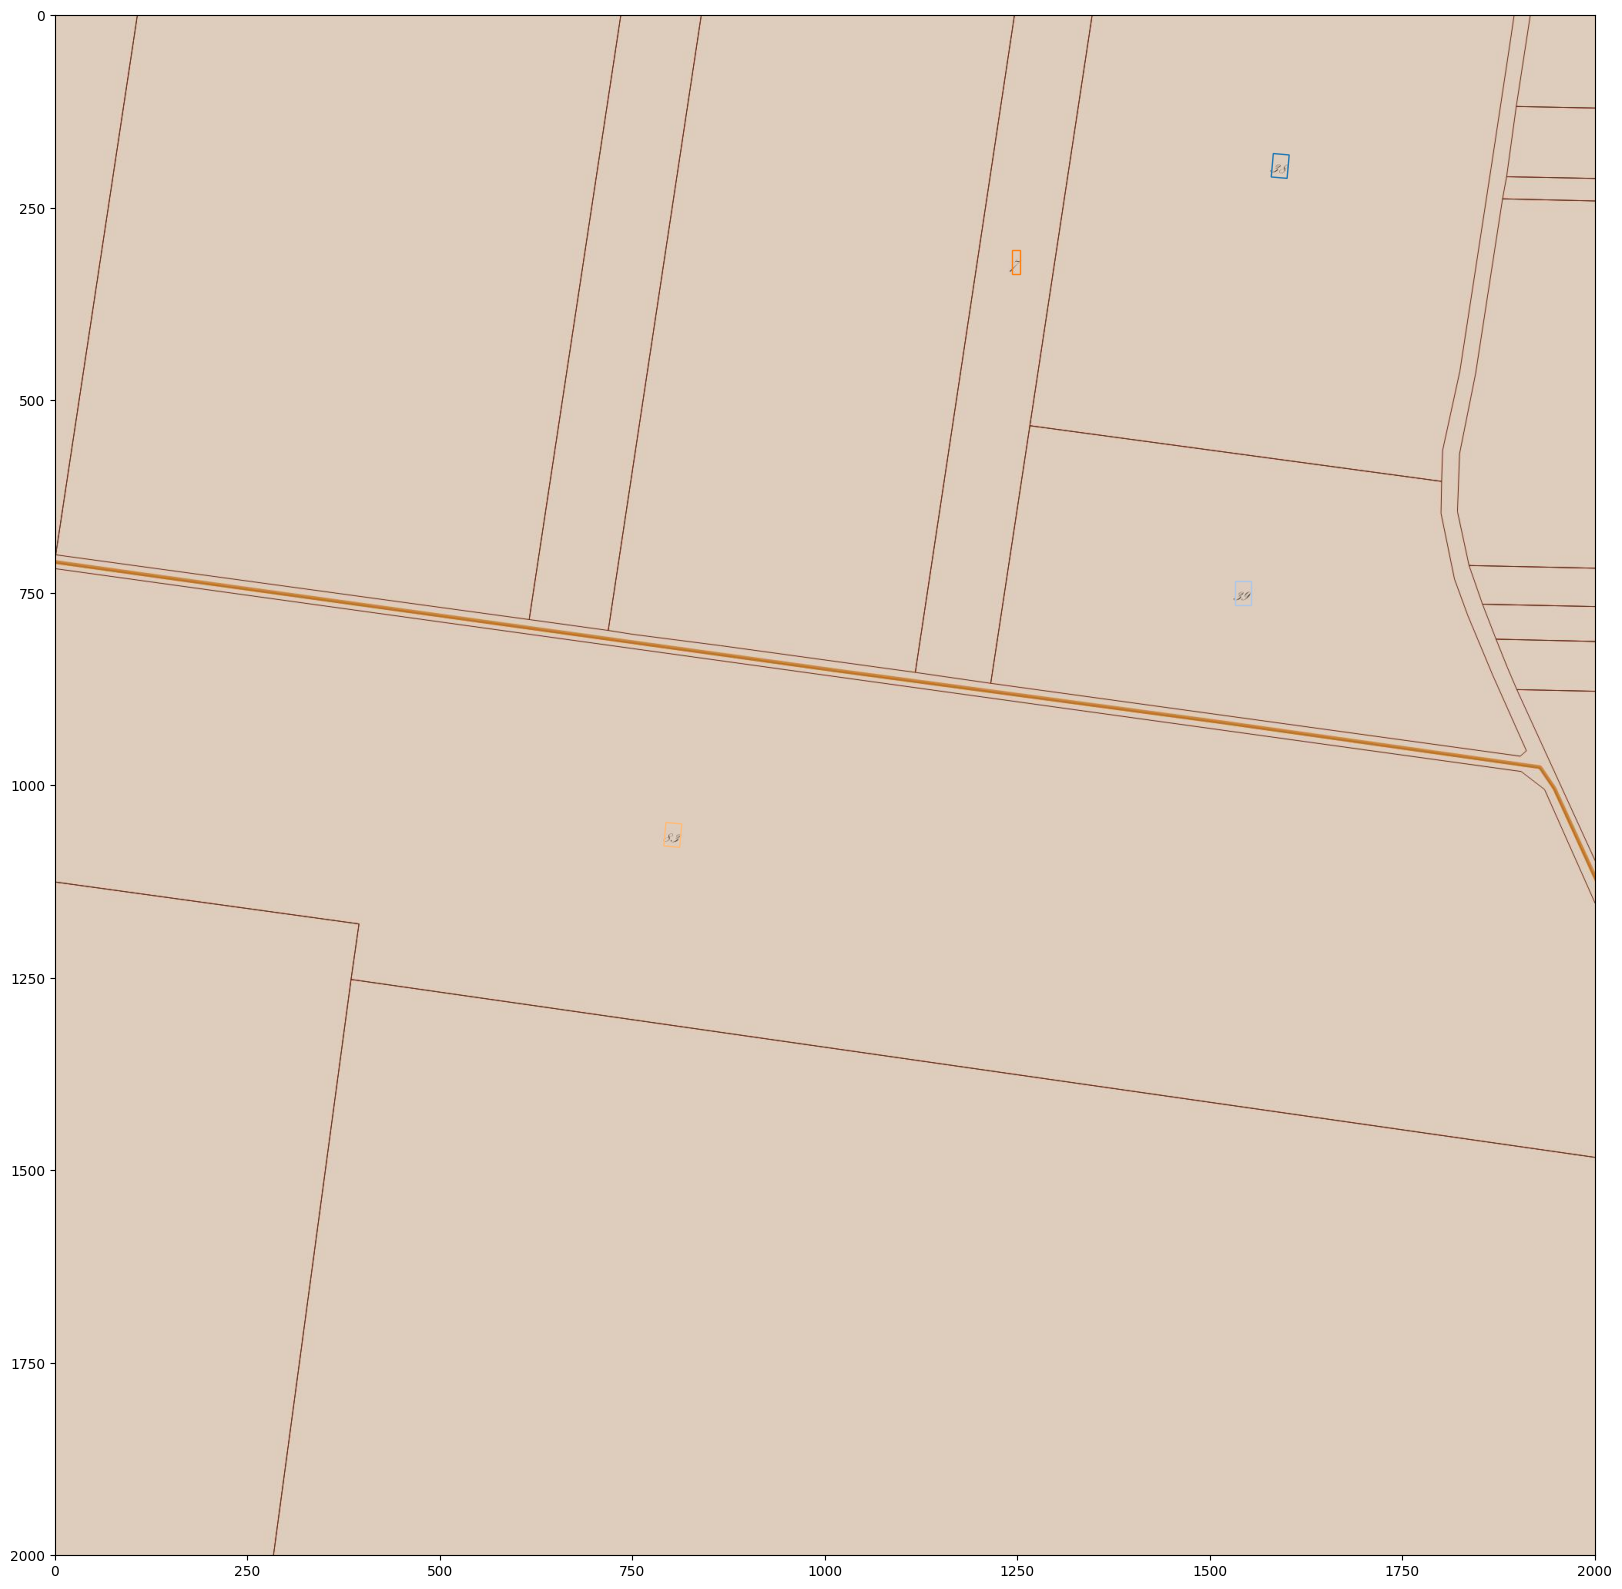

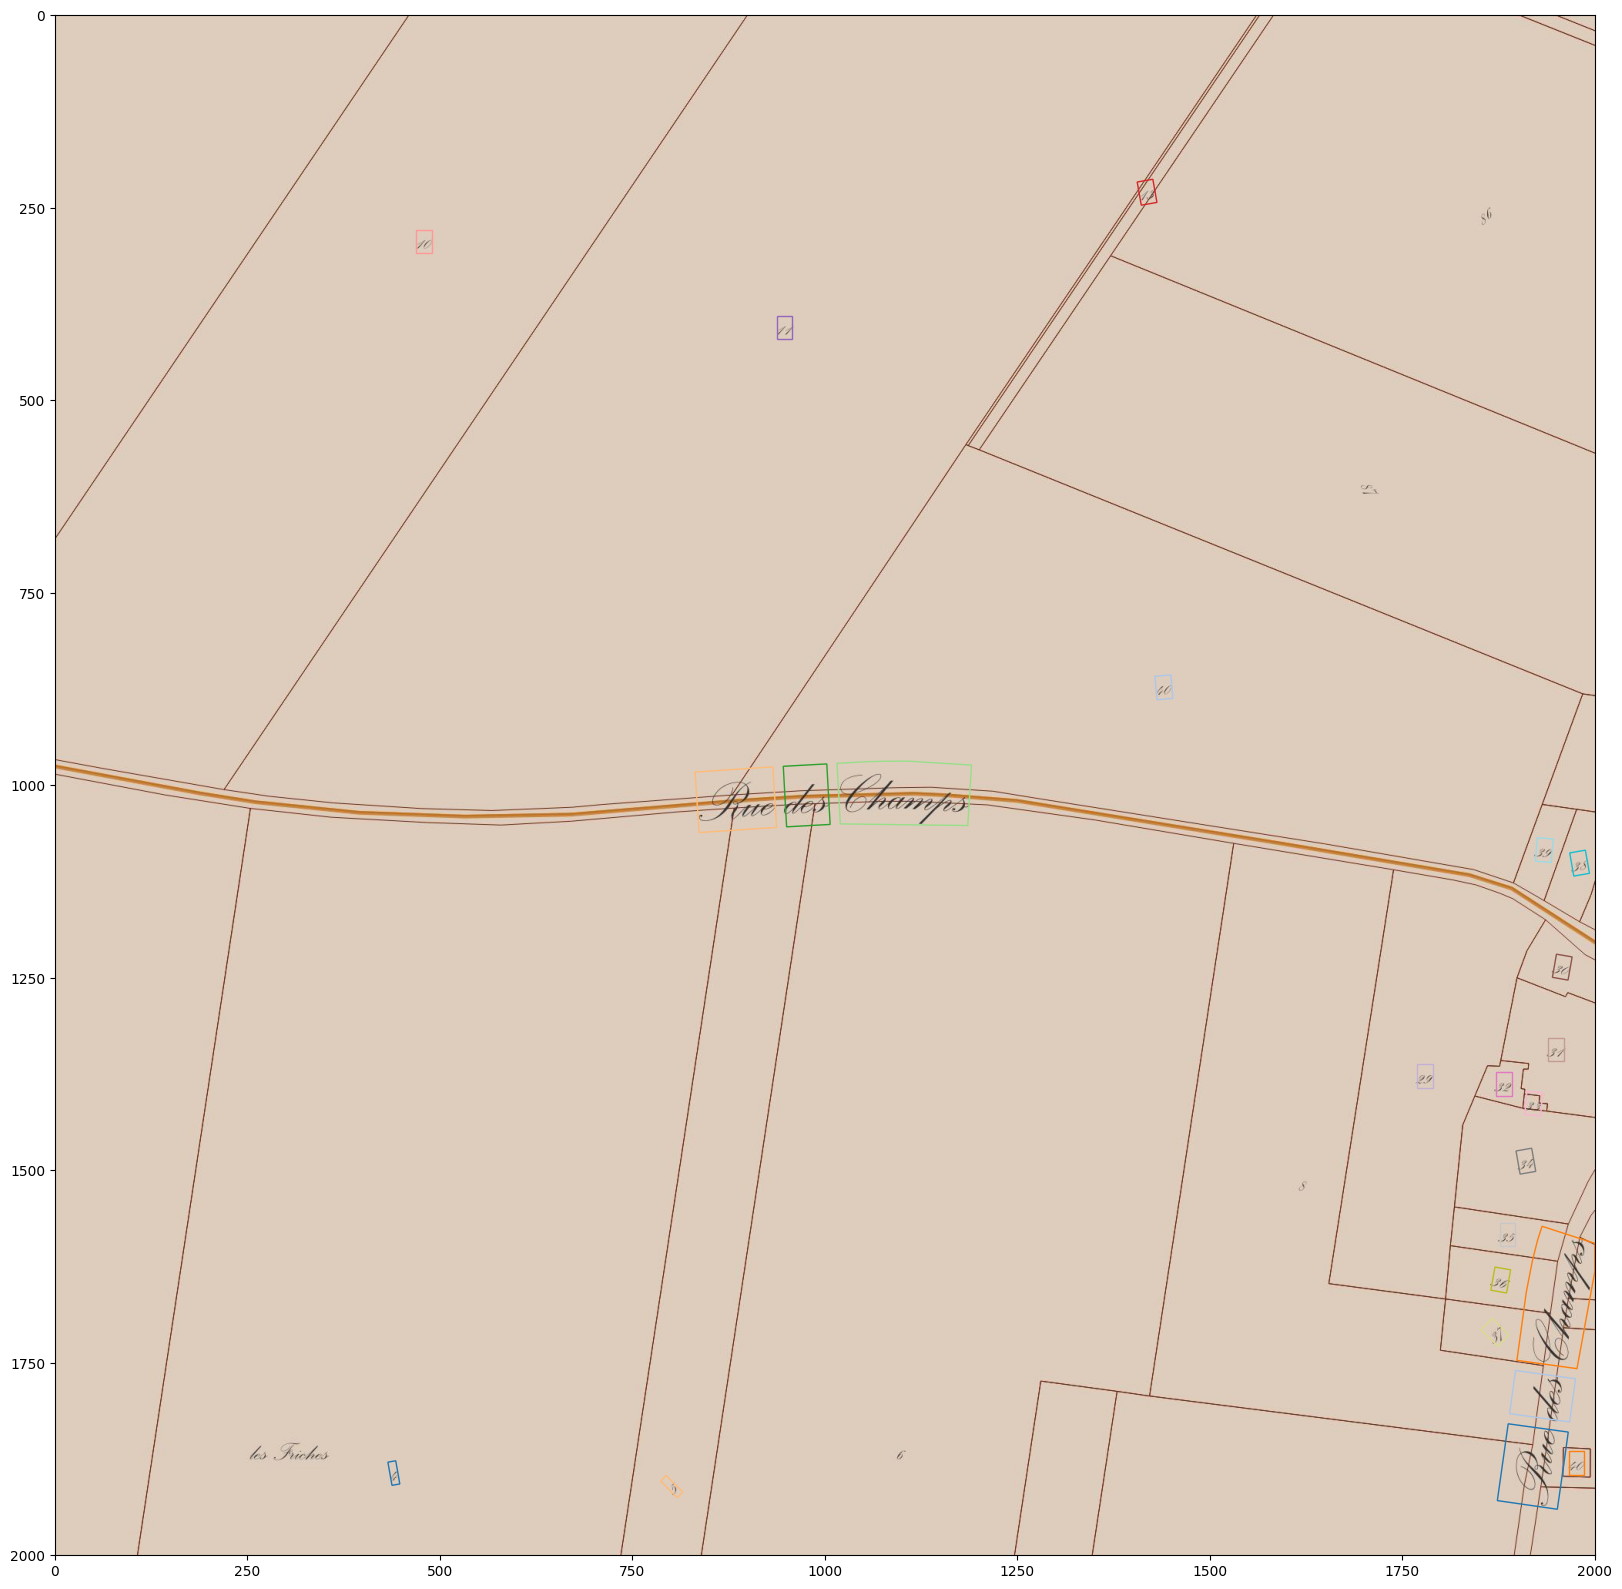

In [26]:
for i in range(1,10):
    zoneid = "region_" + str(i)
    csv_file = f"{ROOT}/outputs/{zoneid}.csv"
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Image dimensions (adjust these to match your image)
    image_path = path + '/outputs/' + zoneid +'.jpg'
    img = mpimg.imread(image_path)
    img_height, img_width, _ = img.shape

    # Create a plot
    fig, ax = plt.subplots()
    ax.imshow(img)

    # Dictionary to store colors for each 'cle_origine'
    color_dict = {}

    # Convert the DataFrame to polygons and plot them
    for _, row in df.iterrows():

        # Create the polygon coordinates, convert geometry to list of coordinates with ast.literal_eval
        coordinates = ast.literal_eval(row['geometry'])
            
        # Create a polygon
        if len(coordinates) > 0:
            polygon = Polygon(coordinates)
                
            # Generate a color for each 'cle_origine' if not already in the dictionary
            if row['group_key'] not in color_dict:
                color_dict[row['group_key']] = plt.cm.tab20(len(color_dict) % 20)
                
            # Create a matplotlib polygon patch
            mpl_polygon = MplPolygon(list(polygon.exterior.coords), closed=True, 
                                        edgecolor=color_dict[row['group_key']], fill=False)
                
            # Add the patch to the plot
            ax.add_patch(mpl_polygon)

        # Set plot limits to image dimensions
        ax.set_xlim(0, img_width)
        ax.set_ylim(img_height, 0)  # Flip the y-axis to match image coordinates

        #increase fig resolution
        fig.set_size_inches(20, 20)
        #plt.show()
        fig.savefig(f'E:/codes/cadastre_synth_maps/viz/{zoneid}.png', dpi=fig.dpi)

In [23]:
plt.show()